In [2]:
import pandas as pd
df = pd.read_csv('Suicides in india 2001-2012.csv')
df = df[df['Type_code'] == 'Causes']

In [60]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [15]:
df.isnull().sum()   #no value is missing

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

visualise the data first

In [16]:
import matplotlib.pyplot as plt
import seaborn as sn

In [61]:
df[df["Total"] >0 ].count()

State        39531
Year         39531
Type_code    39531
Type         39531
Gender       39531
Age_group    39531
Total        39531
dtype: int64

In [62]:
df[df['Total'] > 0]['Total'].sum()

1440974

## Number of Suicides by state

In [63]:
Sucidies_by_state = df.groupby('State').Total.sum()

In [64]:
Sucidies_by_state.index

Index(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli', 'Daman & Diu',
       'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype='object', name='State')

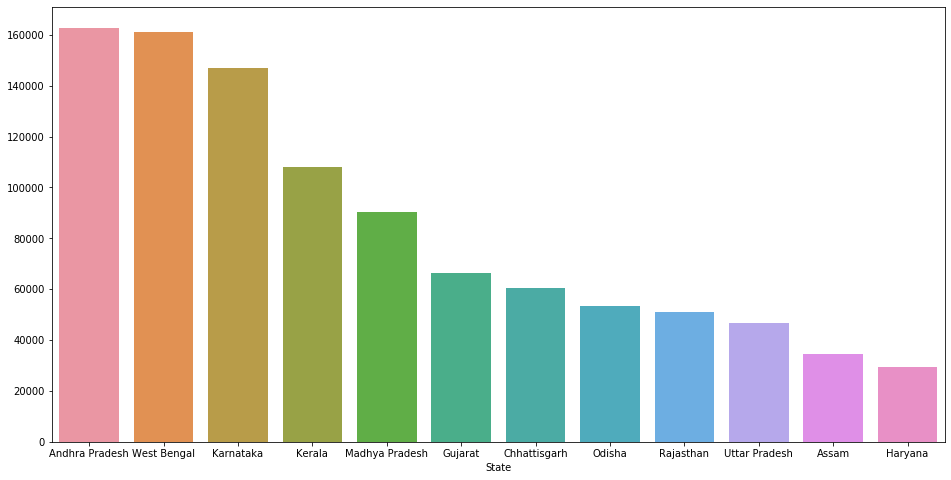

In [65]:
Sucidies_by_state.sort_values(ascending= False,inplace = True)
plt.figure(figsize = (16,8))
sn.barplot(x = Sucidies_by_state.index[2:14] , y = Sucidies_by_state.values[2:14])

Suidices of 12 most suicidal states

Let's check per capita Suicide for better analysis

In [66]:
pop = pd.read_csv('population.csv', header = None)

In [67]:
pop.index = pop[0]

In [68]:
pop = pop[1]

In [69]:
pop.index = pop.index.str.title()

In [70]:
pop

0
A & N Islands           380581
Andhra Pradesh        84580777
Arunachal Pradesh      1383727
Assam                 31205576
Bihar                104099452
Chandigarh             1055450
Chhattisgarh          25545198
D & N Haveli            343709
Daman & Diu             243247
Goa                    1458545
Gujarat               60439692
Haryana               25351462
Himachal Pradesh       6864602
Jammu & Kashmir       12541302
Jharkhand             32988134
Karnataka             61095297
Kerala                33406061
Lakshadweep              64473
Madhya Pradesh        72626809
Maharashtra          112374333
Manipur                2855794
Meghalaya              2966889
Mizoram                1097206
Nagaland               1978502
Delhi (Ut)            16787941
Odisha                41974218
Puducherry             1247953
Punjab                27743338
Rajasthan             68548437
Sikkim                  610577
Tamil Nadu            72147030
Tripura                3673917
Uttar 

In [71]:
percapita = Sucidies_by_state/pop

In [72]:
percapita

A & N Islands        0.004265
Andhra Pradesh       0.001925
Arunachal Pradesh    0.000960
Assam                0.001105
Bihar                0.000089
Chandigarh           0.000980
Chhattisgarh         0.002368
D & N Haveli         0.001996
Daman & Diu          0.001147
Delhi (Ut)           0.001004
Goa                  0.002383
Gujarat              0.001095
Haryana              0.001161
Himachal Pradesh     0.000775
Jammu & Kashmir      0.000237
Jharkhand            0.000302
Karnataka            0.002406
Kerala               0.003231
Lakshadweep          0.000155
Madhya Pradesh       0.001243
Maharashtra          0.001605
Manipur              0.000147
Meghalaya            0.000366
Mizoram              0.000760
Nagaland             0.000175
Odisha               0.001273
Puducherry           0.005152
Punjab               0.000334
Rajasthan            0.000744
Sikkim               0.003151
Tamil Nadu           0.002271
Tripura              0.002503
Uttar Pradesh        0.000234
Uttarakhan

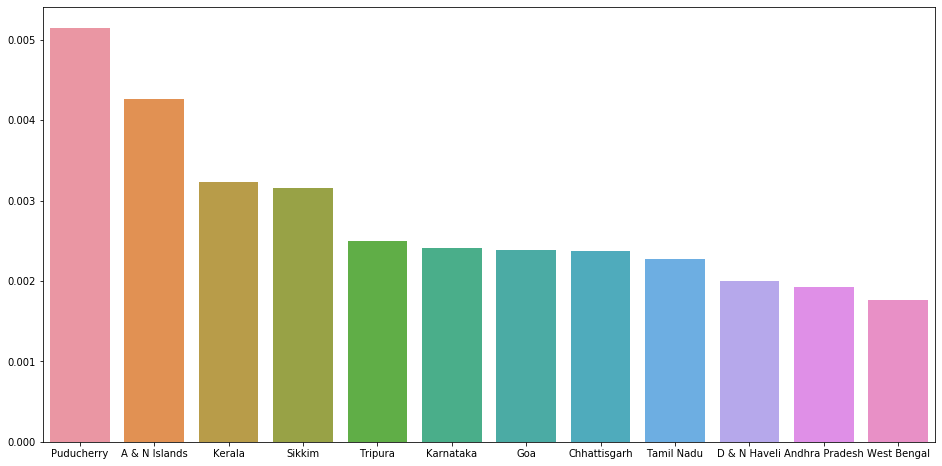

In [73]:
percapita.sort_values(ascending= False,inplace = True)
plt.figure(figsize = (16,8))
sn.barplot(x = percapita.index[:12] , y = percapita.values[:12])

States or union territories with lower population is showing higher per capita rates.

In [74]:
Sucidies_per_cause = df.groupby('Type').Total.sum()

In [82]:
Sucidies_per_cause.drop(['Causes Not known','Other Causes (Please Specity)' ],axis = 0,inplace = True)

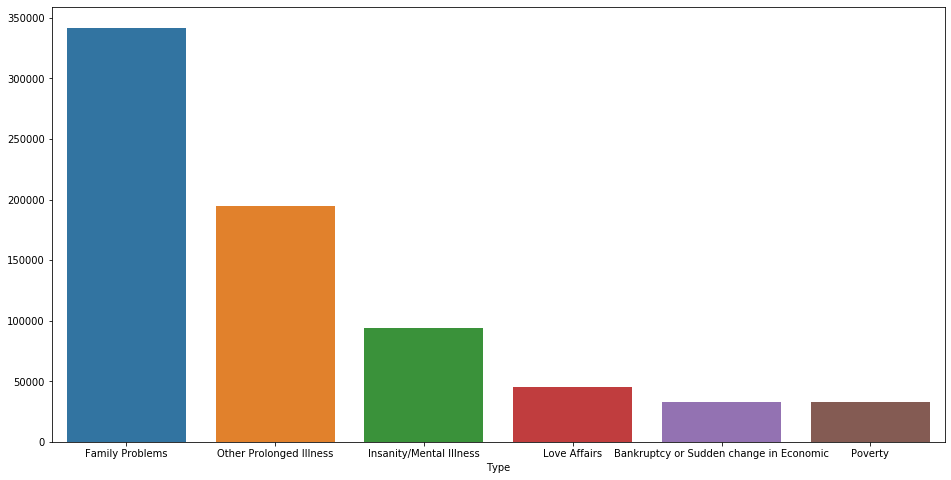

In [84]:
Sucidies_per_cause.sort_values(ascending= False,inplace = True)
plt.figure(figsize = (16,8))
sn.barplot(x = Sucidies_per_cause.index[:6], y = Sucidies_per_cause.values[:6])

family problems is the leading known cause of Suicides in india

In [87]:
Suicides_over_time = df.groupby('Year').Total.sum()

In [88]:
Suicides_over_time

Year
2001    108506
2002    110417
2003    110851
2004    113697
2005    113914
2006    118112
2007    122637
2008    125017
2009    127151
2010    134599
2011    135585
2012    120488
Name: Total, dtype: int64

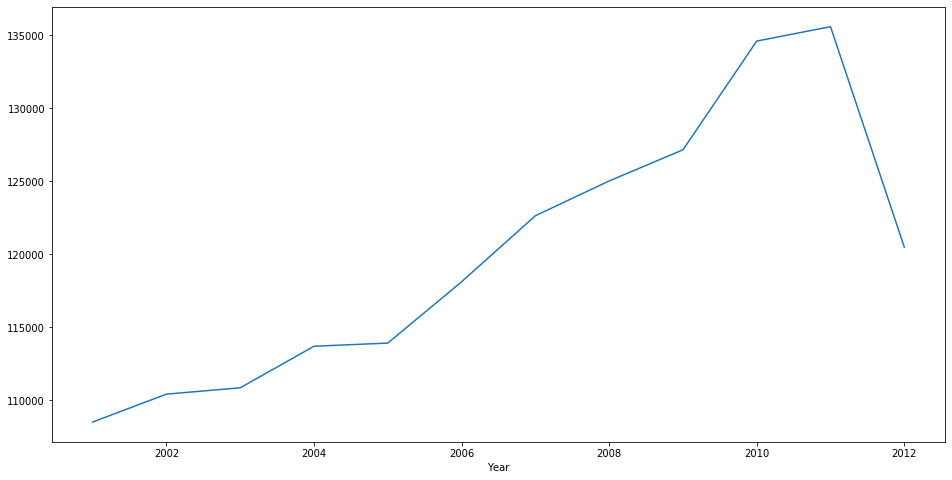

In [92]:
plt.figure(figsize = (16,8))
sn.lineplot(x = Suicides_over_time.index,y = Suicides_over_time.values)

we an increase in number of recorded cases in india from 2002 to 2011.

In [95]:
df = pd.read_csv('Suicides in india 2001-2012.csv')
df = df[df['Type_code'] == 'Professional_Profile']

In [99]:
suicide_by_profession = df.groupby('Type').Total.sum()

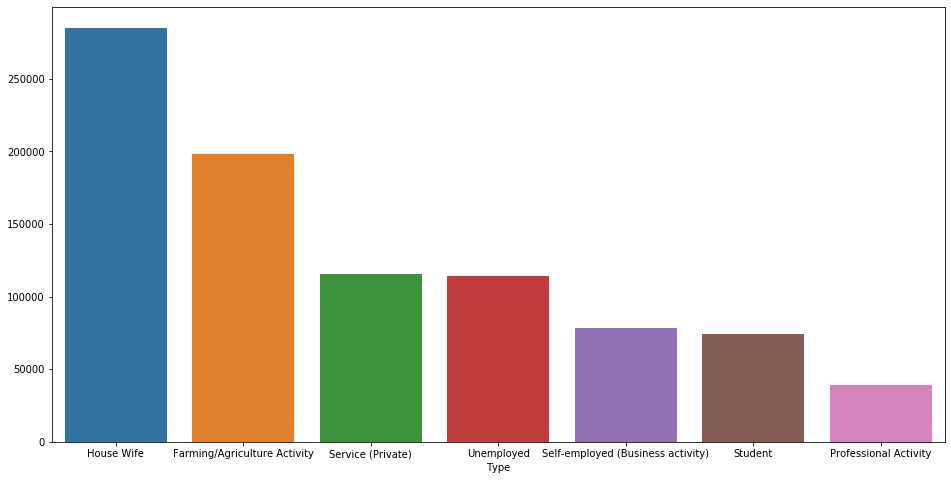

In [103]:
suicide_by_profession.sort_values(ascending= False,inplace = True)
plt.figure(figsize = (16,8))
sn.barplot(x = suicide_by_profession.index[1:8] , y = suicide_by_profession.values[1:8])

Highest Known Suicide in India is among the house wifes

In [10]:
by_age = df.groupby('Age_group').Total.sum()

In [11]:
import seaborn as sn

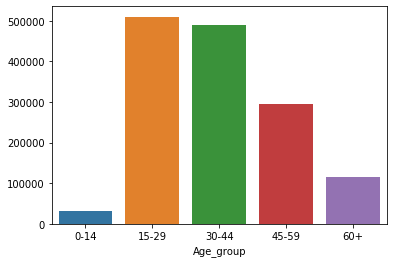

In [12]:
%matplotlib inline
sn.barplot(x = by_age.index,y = by_age.values)


we can see that most vulnerable group is between age 15 and 44.